In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings('ignore')


In [2]:
#Importing dataset
Dataset= pd.read_csv('Dataset.csv')
#Checking datatypes
Dataset.dtypes


Sr                   int64
Date                object
Room Amount        float64
Dine In Amount       int64
Takeaway Amount      int64
Bar Amount           int64
dtype: object

In [3]:
#Coverting Date column format to d-m-y format
Dataset['Date'] = pd.to_datetime(Dataset.Date, format="%d-%m-%Y")
#Fetching top 5 vaules from the data
Dataset.head()


,Sr,Date,Room Amount,Dine In Amount,Takeaway Amount,Bar Amount
0,1,2013-09-01,0.0,53722,0,7760
1,2,2013-09-02,0.0,39137,0,25239
2,3,2013-09-03,0.0,597,0,4127
3,4,2013-09-04,0.0,0,0,2273
4,5,2013-09-05,0.0,4999,0,12505


In [4]:
#Aganing cheking type for date that it coverted to date from object
Dataset.dtypes


Sr                          int64
Date               datetime64[ns]
Room Amount               float64
Dine In Amount              int64
Takeaway Amount             int64
Bar Amount                  int64
dtype: object

In [5]:
#Augmented Dickey–Fuller test on room Sales
Room_adt = Dataset['Room Amount']
adfuller(Room_adt)


(-5.729049236904381,
 6.665973614243547e-07,
 21,
 2980,
 {'1%': -3.4325462892049194,
  '5%': -2.8625103776222067,
  '10%': -2.5672865579253186},
 69499.70362136149)

In [6]:
# Creating new datafram contiang column of Date and room amount
Data_Room =Dataset[['Date','Room Amount']]
#seting date cloumn as index
Data_Room=Data_Room.set_index('Date')
#Fetching top 5 rows
Data_Room.head()


,Room Amount
Date,
2013-09-01,0.0
2013-09-02,0.0
2013-09-03,0.0
2013-09-04,0.0
2013-09-05,0.0


In [7]:
#setting asfreq as d
Data_Room= Data_Room.asfreq('D')


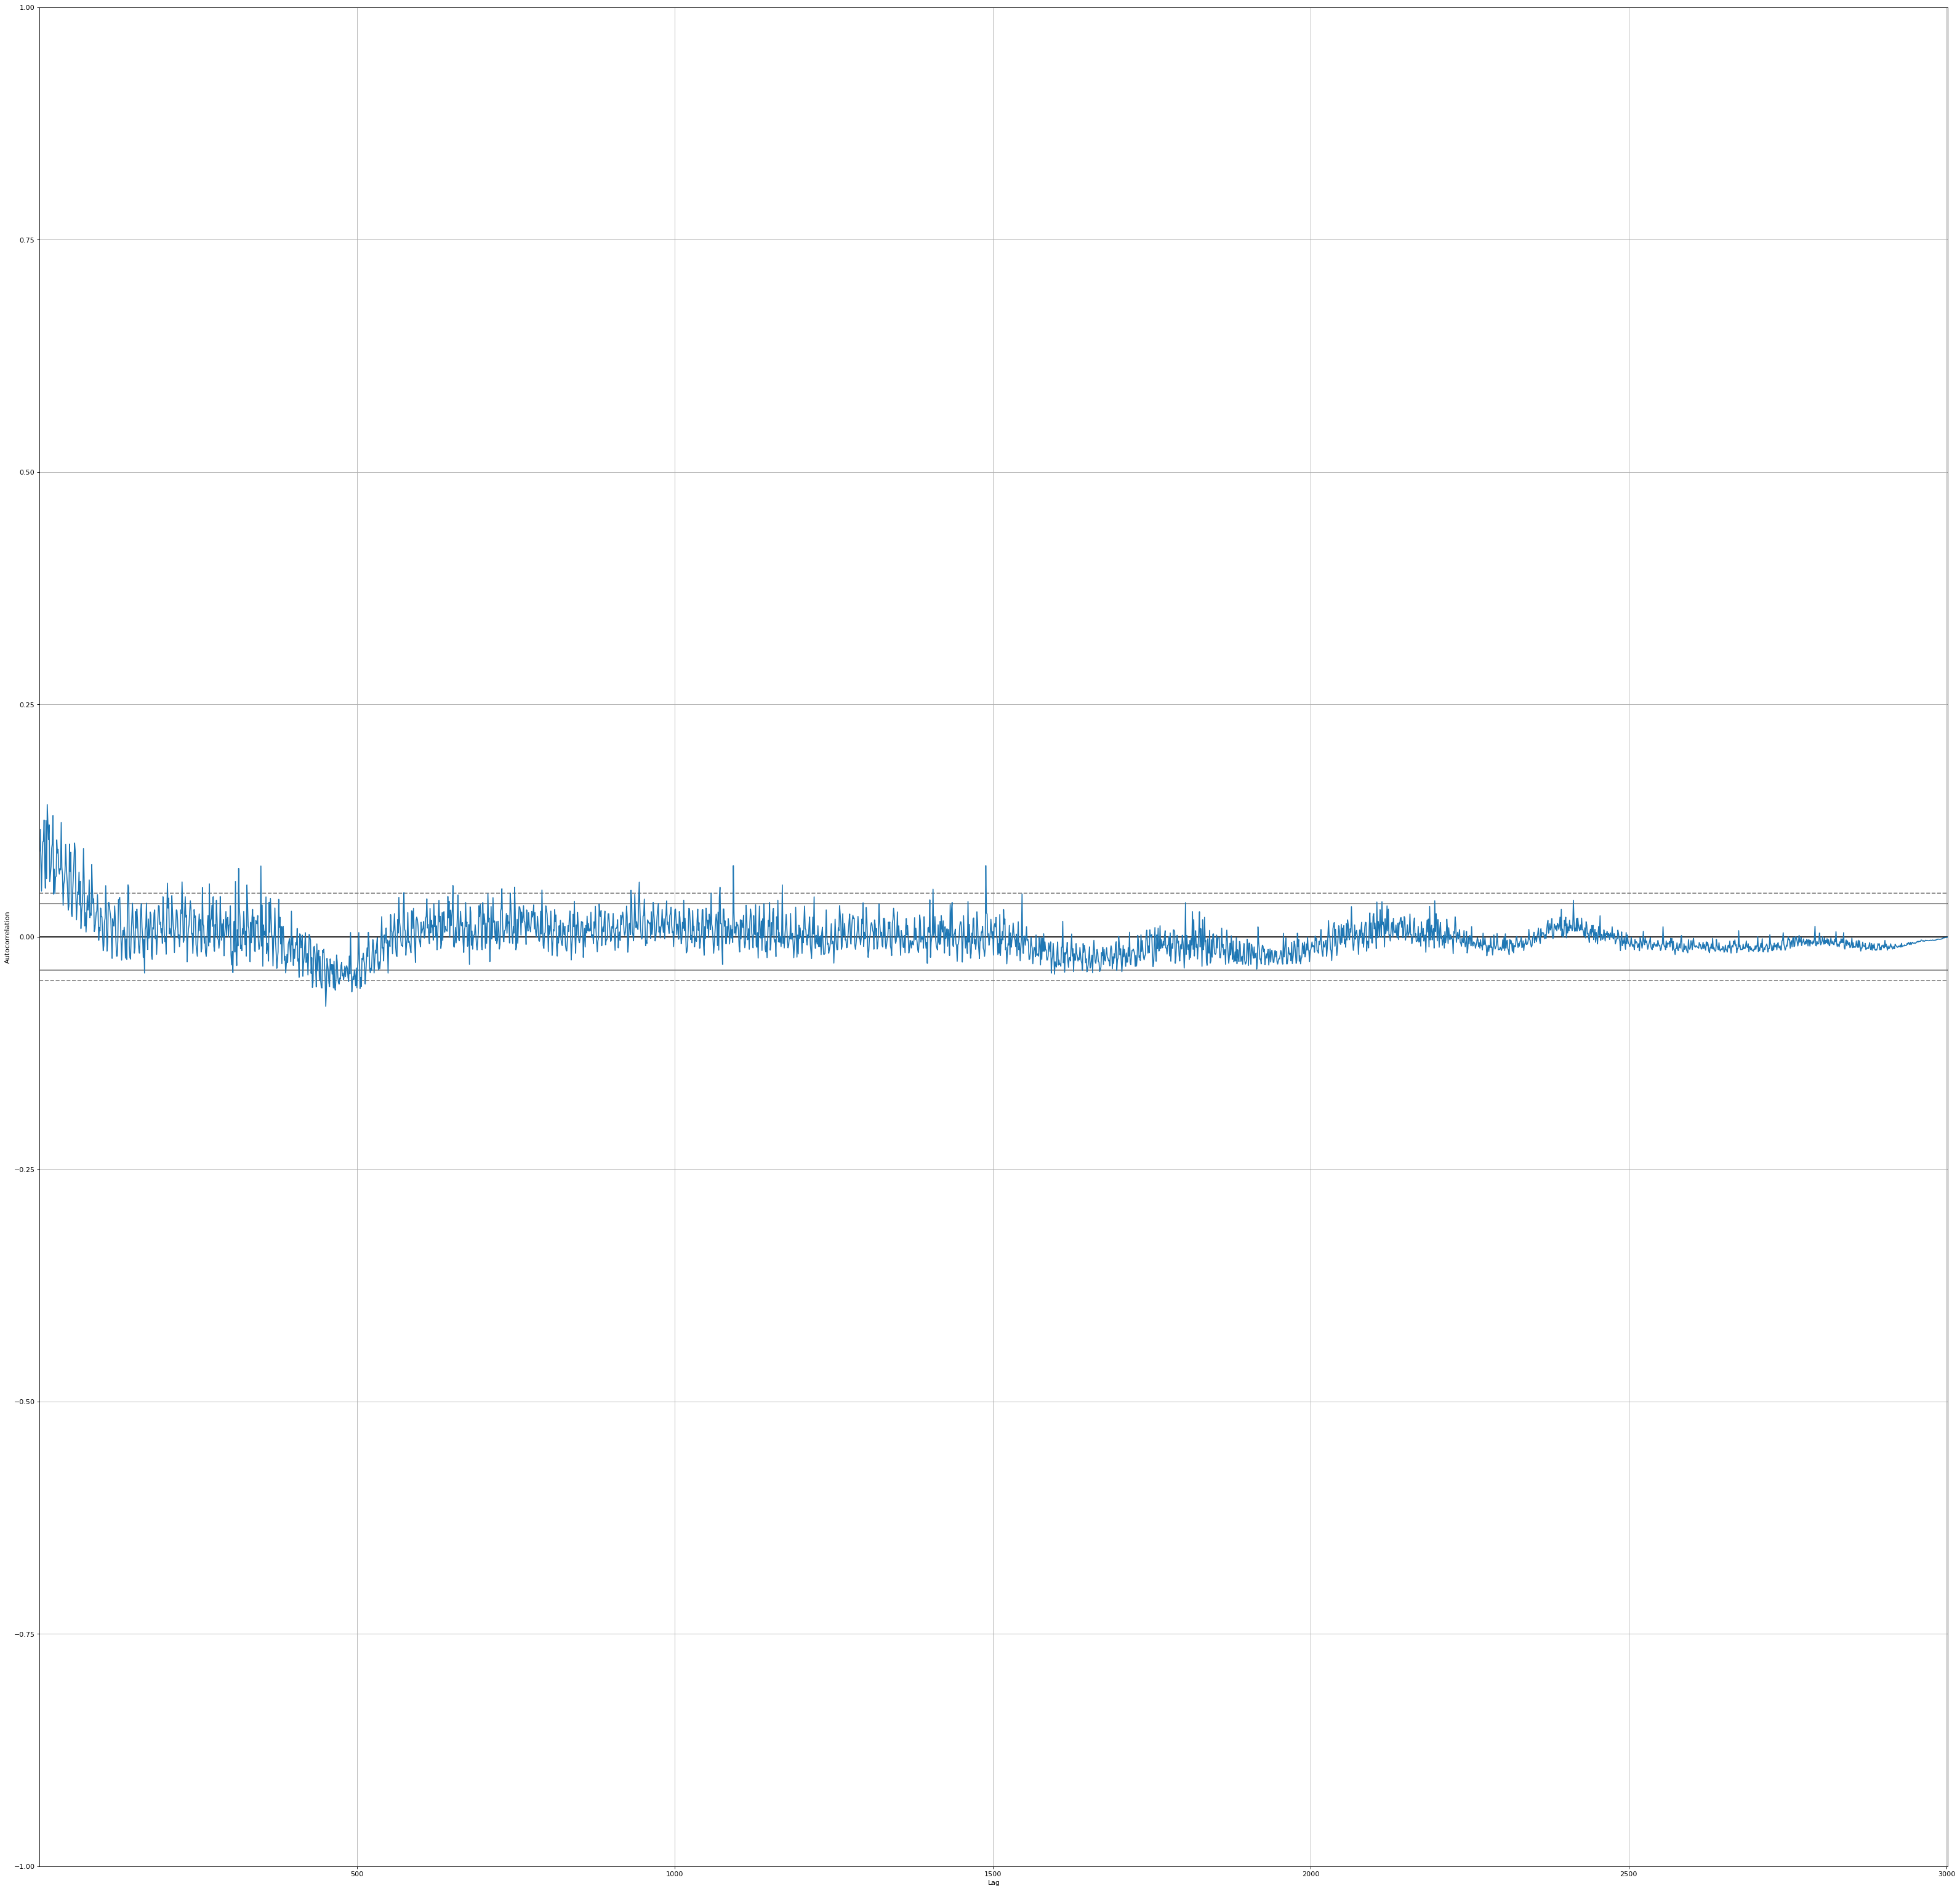

In [8]:
#ploting autocorrelation graph to find seasons
figure(figsize=(50,50),dpi=80)
autocorrelation_plot(Data_Room)
plt.show()


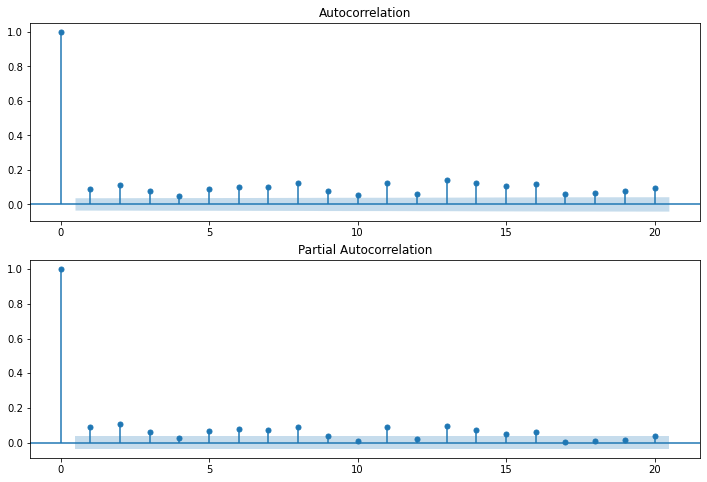

In [9]:
#plotting autocorrelation graph
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(Data_Room,lags=20, ax=ax1)
#plotting partial correlation graph
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Data_Room, lags=20, ax=ax2)


In [10]:
# spillting data for test and train set
Data_Room_Train = Data_Room.iloc[:len(Data_Room) - 600]
Data_Room_Test = Data_Room.iloc[len(Data_Room)-600:]
# creating new dataframe with half data for seasonal decompose
Data_Room_S = Data_Room.iloc[: len(Data_Room) - 1501]


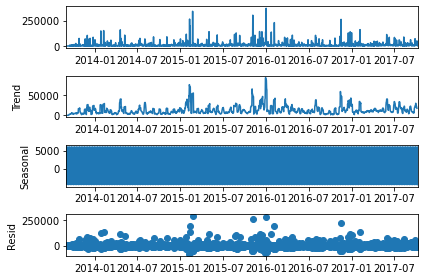

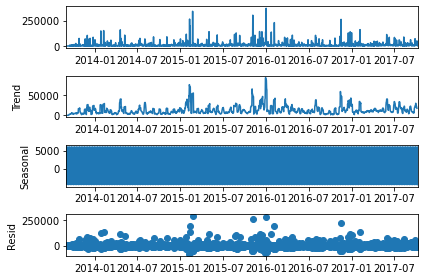

In [11]:
#plotting seasonal decompose chart
res = seasonal_decompose(Data_Room_S)
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(500,300))
res.plot()


In [12]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [13]:
warnings.filterwarnings("ignore")  # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(Data_Room,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:71222.37975144878
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:70774.28563274635
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:71963.79219539333
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:69876.01761018677
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:70704.49496293766
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:70110.84987736255
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:70828.30682748047
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:69876.7622107462
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:70995.50214778112
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:70644.29168581136
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:71936.11331482317
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:70277.13312220995
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:70650.88503330259
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:70165.33205436605
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:70945.16189566701
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:70278.97066271742
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:72136.17470821836
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:71844.13504902266
ARIMA(0, 1,

In [14]:
# training arima model
Room_Model_1= ARIMA(Data_Room_Train, order=(0,1,1)).fit(disp=0)


In [15]:
# printing arima model results
Room_Model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Room Amount   No. Observations:                 2401
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -28136.246
Method:                       css-mle   S.D. of innovations          29695.534
Date:                Mon, 29 Nov 2021   AIC                          56278.492
Time:                        17:03:39   BIC                          56295.843
Sample:                    09-02-2013   HQIC                         56284.804
                         - 03-29-2020                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.0574      5.105      1.578      0.114      -1.948      18.062
ma.L1.D.Room Amount    -0.9920      0.005   -188.240      0.000      -1.002      -0.982
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0080           +0.0000j            1.0080            0.0000
-----------------------------------------------------------------------------
"""

In [16]:
#prediciting sales with arima model
Arima_Pred=Room_Model_1.predict(start = Data_Room_Train.shape[0],end= Data_Room_Train.shape[0]+600)
Arima_Pred


2020-03-30    26838.105880
2020-03-31        8.057392
2020-04-01        8.057392
2020-04-02        8.057392
2020-04-03        8.057392
                  ...     
2021-11-16        8.057392
2021-11-17        8.057392
2021-11-18        8.057392
2021-11-19        8.057392
2021-11-20        8.057392
Freq: D, Length: 601, dtype: float64

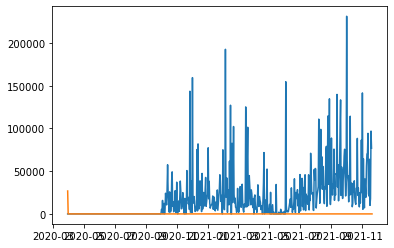

In [17]:
#plotting line garph actual vs predicted values
plt.plot(Data_Room_Test)
plt.plot(Arima_Pred)


In [18]:
# training sarimax model
Room_Model_2 = SARIMAX(Data_Room_Train, order=(0, 1, 1),
                              seasonal_order=(0, 0, 1, 12)).fit(disp=0)


In [19]:
#sarimax model results
Room_Model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Room Amount   No. Observations:                 2402
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood              -28165.008
Date:                            Mon, 29 Nov 2021   AIC                          56336.016
Time:                                    17:03:40   BIC                          56353.367
Sample:                                09-01-2013   HQIC                         56342.328
                                     - 03-29-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9862      0.003   -283.705      0.000      -0.993      -0.979
ma.S.L12      -0.0282      0.032     -0.871      0.384      -0.092       0.035
sigma2      1.109e+09   2.04e-11   5.43e+19      0.000    1.11e+09    1.11e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            244856.32
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             5.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        51.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.15e+33. Standard errors may be unstable.
"""

In [20]:
# prediciting sales with sarima model
Sarima_Pred = Room_Model_2.predict(
    start=Data_Room_Train.shape[0], end=Data_Room_Train.shape[0]+600)
Sarima_Pred


2020-03-30    25468.660552
2020-03-31    25941.855877
2020-04-01    25935.717219
2020-04-02    26027.697518
2020-04-03    26251.681220
                  ...     
2021-11-16    25522.762505
2021-11-17    25522.762505
2021-11-18    25522.762505
2021-11-19    25522.762505
2021-11-20    25522.762505
Freq: D, Name: predicted_mean, Length: 601, dtype: float64

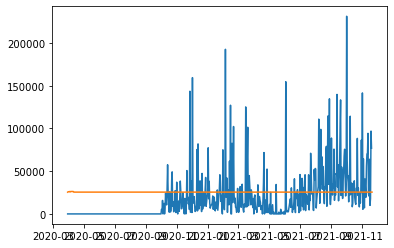

In [21]:
#plotting line garph actual vs predicted values
plt.plot(Data_Room_Test)
plt.plot(Sarima_Pred)


In [22]:
# training Exponential Smoothing model
Room_Model_3 = ExponentialSmoothing(Data_Room_Train,trend="add",seasonal="add",seasonal_periods=365).fit()


In [23]:
#Exponential Smoothing model results
Room_Model_3.summary()


Dep. Variable:,Room Amount,No. Observations:,2402
Model:,ExponentialSmoothing,SSE,2408894612447.408
Optimized:,True,AIC,50522.169
Trend:,Additive,BIC,52656.486
Seasonal:,Additive,AICC,50658.142
Seasonal Periods:,365,Date:,"Mon, 29 Nov 2021"
Box-Cox:,False,Time:,17:03:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0001,beta,True


In [24]:
# prediciting sales with Exponential Smoothing model
ES_Pred = Room_Model_3.predict(
    start=Data_Room_Train.shape[0], end=Data_Room_Train.shape[0]+600)
ES_Pred


2020-03-30    28960.218376
2020-03-31    16056.435072
2020-04-01    33221.058457
2020-04-02    17342.256982
2020-04-03    22317.038285
                  ...     
2021-11-16    53137.132668
2021-11-17    25143.517801
2021-11-18    49911.069552
2021-11-19    33991.089536
2021-11-20    27822.646438
Freq: D, Length: 601, dtype: float64

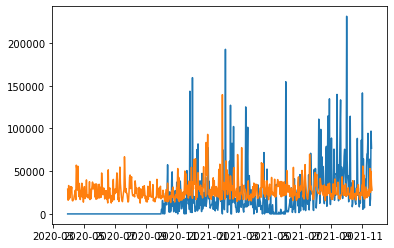

In [25]:
#plotting line garph actual vs predicted values
plt.plot(Data_Room_Test)
plt.plot(ES_Pred)
